In [28]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.colors as mcolors

In [4]:
#loading the data
online_shopping_path = "../starter_code/online_shopping.csv"

In [5]:
#importing the .csv
shopping_data = pd.read_csv(online_shopping_path)


In [6]:
#previewing the data
shopping_data.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [7]:
# looking at the .info for null values and dtypes
shopping_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [8]:
# getting the column headings to use for analysis
print(shopping_data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [9]:
#dropping the unnamed and the sku column
clean_shopping_df = shopping_data.drop(['Unnamed: 0','Product_SKU'], axis=1, inplace=False)


In [10]:
#dropping remaining null values
clean_shopping_df = clean_shopping_df.dropna(axis=0, how="any")
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_Description  52524 non-null  object 
 7   Product_Category     52524 non-null  object 
 8   Quantity             52524 non-null  float64
 9   Avg_Price            52524 non-null  float64
 10  Delivery_Charges     52524 non-null  float64
 11  Coupon_Status        52524 non-null  object 
 12  GST                  52524 non-null  float64
 13  Date                 52524 non-null  object 
 14  Offline_Spend        52524 non-null  float64
 15  Online_Spend         52524 non-null  floa

In [11]:
#looking at product counts
clean_shopping_df.Product_Category.value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64

In [12]:
#coupon status counts
clean_shopping_df.Coupon_Status.value_counts()

Coupon_Status
Clicked     26720
Used        17778
Not Used     8026
Name: count, dtype: int64

In [13]:
clean_shopping_df.Coupon_Code.value_counts()

Coupon_Code
SALE20     6373
SALE30     5915
SALE10     5838
ELEC10     4826
ELEC30     4647
ELEC20     4540
EXTRA10    2317
OFF10      2250
EXTRA20    2211
OFF20      2202
OFF30      2061
EXTRA30    2047
NE30       1003
NE20        740
AIO10       654
AIO20       618
AIO30       610
NE10        455
NJ20        299
NJ10        280
HGEAR10     267
HGEAR20     267
HGEAR30     237
WEMP20      205
WEMP30      185
NJ30        170
WEMP10      164
NCA10       116
NCA30       110
BT10         98
ACC20        97
NCA20        91
GC10         89
BT30         87
BT20         83
ACC30        77
ACC10        60
HOU20        50
HOU10        42
GC20         41
HOU30        30
GC30         29
AND30        16
AND10        14
AND20        13
Name: count, dtype: int64

In [14]:
#gender value counts
clean_shopping_df.Gender.value_counts()

Gender
F    32767
M    19757
Name: count, dtype: int64

In [15]:
#location value counts
clean_shopping_df.Location.value_counts()

Location
Chicago          18240
California       16008
New York         11097
New Jersey        4470
Washington DC     2709
Name: count, dtype: int64

In [41]:
# convert date to month, day, year
clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])
clean_shopping_df["Transaction_Date"] = clean_shopping_df["Transaction_Date"].dt.strftime("%m-%d-%Y")

clean_shopping_df.head()


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,01-01-2019,Nest Cam Outdoor Security Camera - USA,Nest,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,01-01-2019,Nest Protect Smoke + CO White Battery Alarm-USA,Nest,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [17]:
#clean_shopping_df.tail()
#clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])

In [42]:
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_Description  52524 non-null  object 
 7   Product_Category     52524 non-null  object 
 8   Quantity             52524 non-null  float64
 9   Avg_Price            52524 non-null  float64
 10  Delivery_Charges     52524 non-null  float64
 11  Coupon_Status        52524 non-null  object 
 12  GST                  52524 non-null  float64
 13  Date                 52524 non-null  object 
 14  Offline_Spend        52524 non-null  float64
 15  Online_Spend         52524 non-null  floa

In [35]:
clean_shopping_df.Quantity.value_counts()

Quantity
1.0      35109
2.0       6953
3.0       2268
5.0       1721
4.0       1221
         ...  
350.0        1
295.0        1
166.0        1
96.0         1
133.0        1
Name: count, Length: 151, dtype: int64

In [19]:
#combining new york and new jersy into one group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New York": "New Jersey"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Chicago          18240
California       16008
New Jersey       15567
Washington DC     2709
Name: count, dtype: int64>

In [20]:
#combining washington DC and the new jersey group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New Jersey": "Washington DC"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Washington DC    18276
Chicago          18240
California       16008
Name: count, dtype: int64>

In [21]:
#renaming the group to northeast
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"Washington DC": "North East"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
North East    18276
Chicago       18240
California    16008
Name: count, dtype: int64>

In [22]:
#combining nest canada and nest usa
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-Canada": "Nest-USA"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest-USA                14330
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [23]:
#grouping all the nest categories together
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-USA": "Nest"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest                    16528
Office                   6513
Drinkware                3483
Lifestyle                3092
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [36]:
heatmap_data = clean_shopping_df.drop(['Transaction_ID','CustomerID'], axis=1, inplace=False)

In [37]:
corrs = heatmap_data.corr(numeric_only = True)
corrs

,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
Tenure_Months,1.000000,0.006807,-0.000916,-0.014535,-0.001652,0.040147,0.025451,0.018878,0.029703
Quantity,0.006807,1.000000,-0.114066,0.191787,-0.028219,-0.004583,0.010647,-0.027297,-0.011381
Avg_Price,-0.000916,-0.114066,1.000000,-0.108026,-0.575806,0.094083,0.060772,0.118675,0.027688
Delivery_Charges,-0.014535,0.191787,-0.108026,1.000000,0.029983,-0.013219,-0.019590,-0.085363,-0.018870
GST,-0.001652,-0.028219,-0.575806,0.029983,1.000000,-0.073077,-0.046616,-0.094246,-0.012852
Offline_Spend,0.040147,-0.004583,0.094083,-0.013219,-0.073077,1.000000,0.336336,0.201543,0.051719
Online_Spend,0.025451,0.010647,0.060772,-0.019590,-0.046616,0.336336,1.000000,0.165820,0.024343
Month,0.018878,-0.027297,0.118675,-0.085363,-0.094246,0.201543,0.165820,1.000000,0.236194
Discount_pct,0.029703,-0.011381,0.027688,-0.018870,-0.012852,0.051719,0.024343,0.236194,1.000000


In [33]:
#corrs.describe()

In [25]:
project_colors = ["#FF8360","#E8E288","#7DCE82","#3CDBD3","#00FFF5"]
sns.set_palette(project_colors)

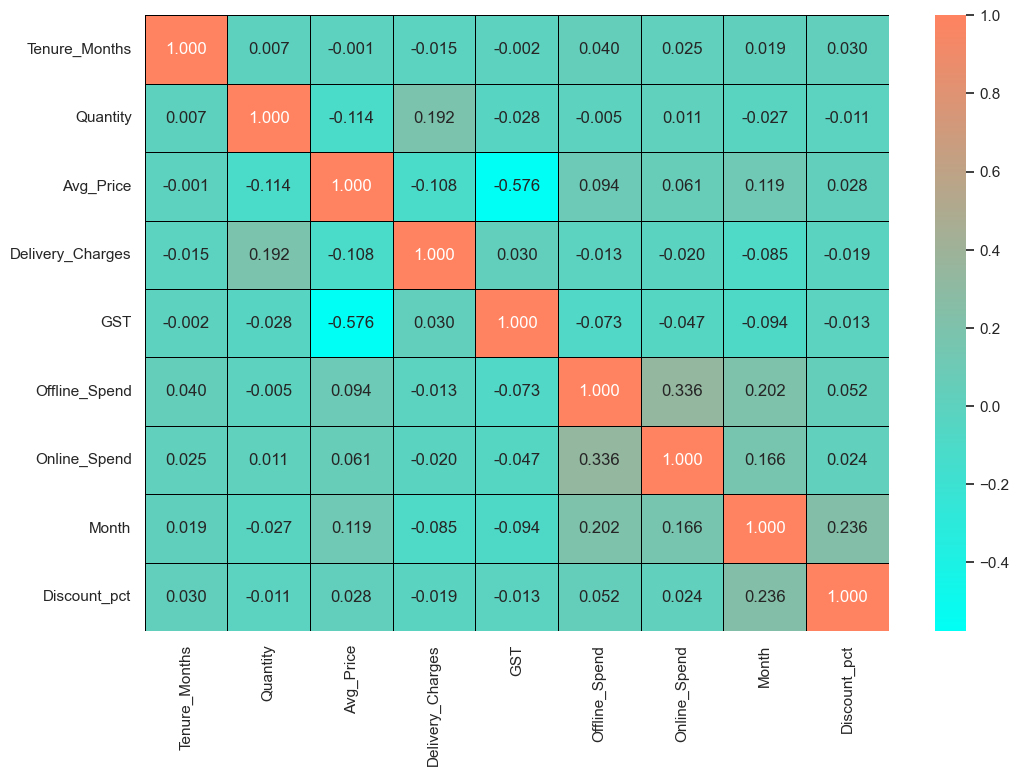

In [64]:
# Define the colors for the gradient diverging color palette
colors = ["#00FFF5", "#FF8360"]  # Blue, Yellow, Red

# Create a gradient color map using LinearSegmentedColormap
color_map = mcolors.LinearSegmentedColormap.from_list("my_palette", colors)

#making the heatmap a better size
plt.figure(figsize=(12, 8))

# Create a heatmap with the gradient diverging color palette
sns.heatmap(corrs, cmap=color_map, linewidths=0.5, linecolor='black', annot = True, fmt=".3f")

plt.savefig("Heatmap")
plt.show()

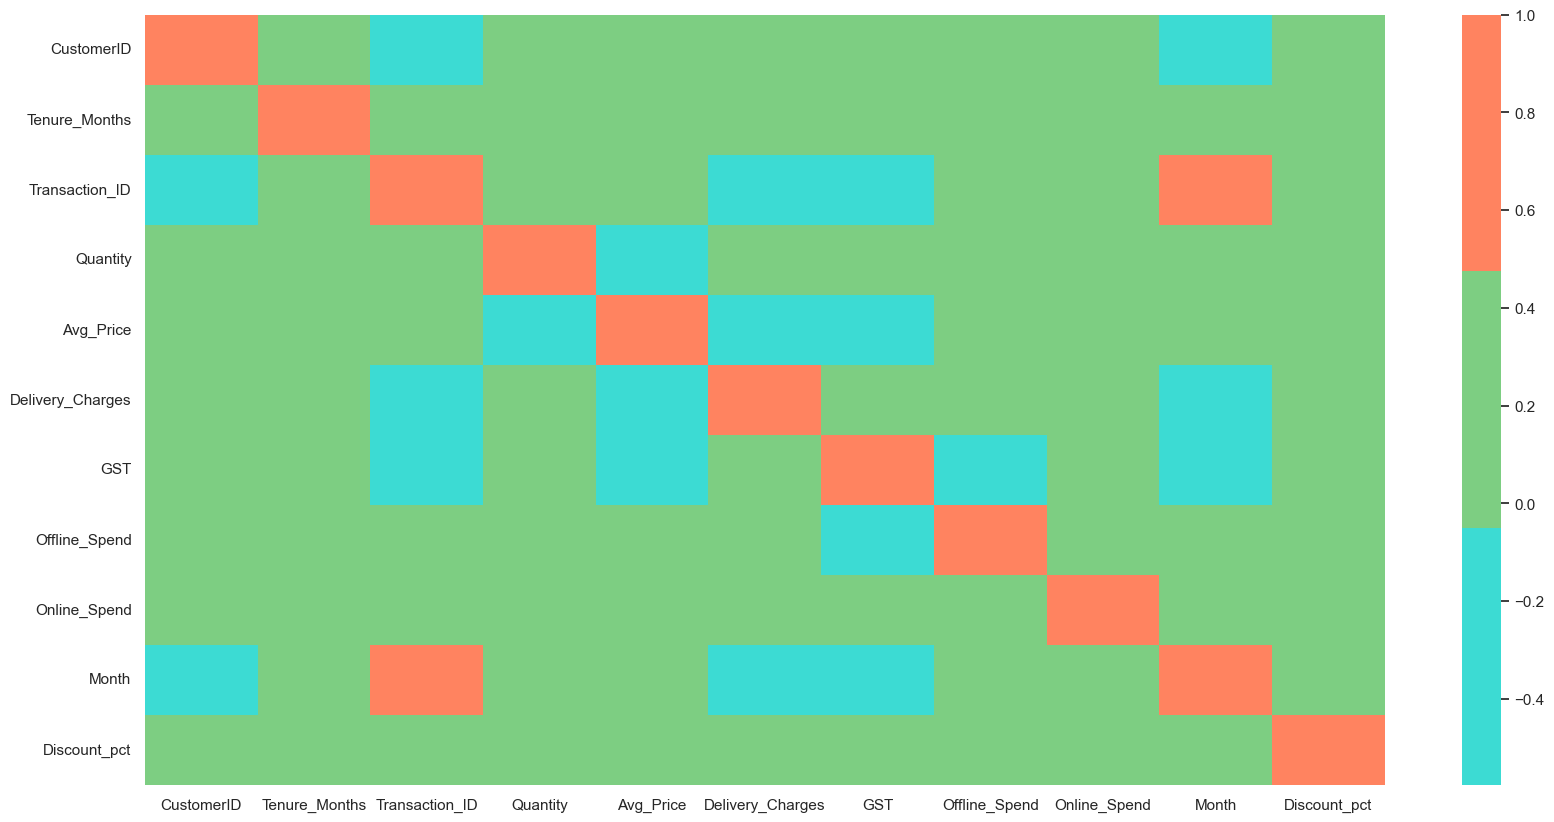

In [157]:
import matplotlib.colors as mcolors

# Specify the hex color codes for the start, middle, and end colors
start_color = "#3CDBD3"  # Blue
mid_color = "#7DCE82"    # Yellow
end_color = "#FF8360"    # Red

# Create a custom diverging color palette using hex color codes
colors = [start_color, mid_color, end_color]
custom_palette = sns.color_palette(colors)

# Create a heatmap with the custom diverging color palette
sns.heatmap(corrs, cmap=custom_palette)

plt.show()

In [147]:
# correlation heatmap for all of the categories
#doesnt seem like there is any correlation for any of these except MAYBE transaciton id and month, this might be an anomolie
plt.figure(figsize=(10,6))
colors = sns.diverging_palette (
#sns.heatmap(corrs, cmap=project_colors)
sns.diverging_palette(corrs, 220, 20, as_cmap=True)
plt.title("Correlations")
plt.show()

TypeError: must be real number, not DataFrame

<Figure size 1000x600 with 0 Axes>

In [72]:
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_Description  52524 non-null  object 
 7   Product_Category     52524 non-null  object 
 8   Quantity             52524 non-null  float64
 9   Avg_Price            52524 non-null  float64
 10  Delivery_Charges     52524 non-null  float64
 11  Coupon_Status        52524 non-null  object 
 12  GST                  52524 non-null  float64
 13  Date                 52524 non-null  object 
 14  Offline_Spend        52524 non-null  float64
 15  Online_Spend         52524 non-null  floa

In [73]:
project_colors = ["#FF8360","#E8E288","#7DCE82","#3CDBD3","#00FFF5"]
sns.set_palette(project_colors)

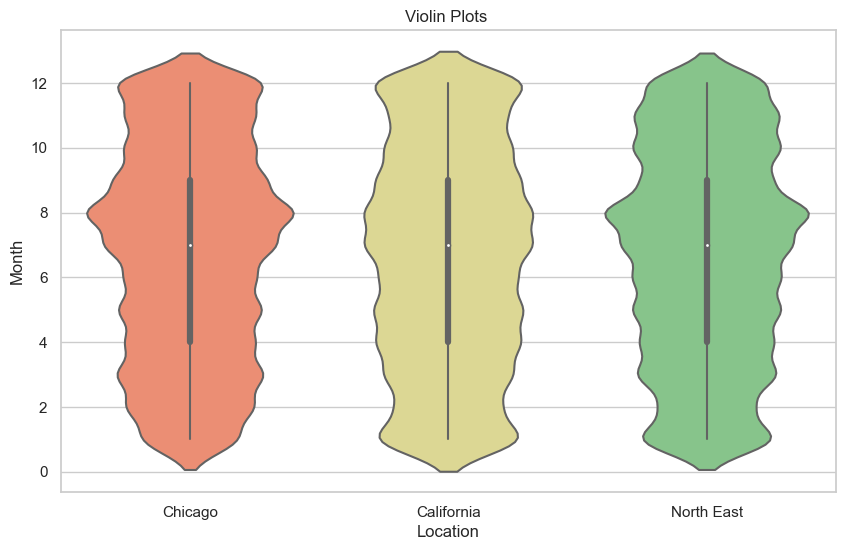

In [74]:
#violin plot test
# distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=clean_shopping_df, x="Location", y="Month")
plt.title("Violin Plots ")
plt.show()

In [134]:
#to get he stats data for each of the categories that we are looking at for the regressions 
print(clean_shopping_df['Online_Spend'].describe())

count    52524.000000
mean      1894.216417
std        807.160639
min        320.250000
25%       1252.630000
50%       1837.870000
75%       2425.350000
max       4556.930000
Name: Online_Spend, dtype: float64


In [46]:
clean_shopping_df["Total_Amount"]=clean_shopping_df["Avg_Price"]*clean_shopping_df["Quantity"]+clean_shopping_df["Delivery_Charges"]
clean_shopping_df["Total_Transaction"]=clean_shopping_df["Offline_Spend"]+clean_shopping_df["Online_Spend"]

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

online_mean = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].mean()
online_median = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].median()
online_variance = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].var()
online_stand_dev = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].std()
online_sem = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].sem()

online_data = {
    "Online Avg": online_mean,
    "Online Med": online_median,
    "Online Var": online_variance,
    "Online Stand Dev": online_stand_dev,
    "Online SEM": online_sem
}



online_leaderboard = pd.DataFrame(online_data).reset_index()
online_leaderboard

,Location,Gender,Online Avg,Online Med,Online Var,Online Stand Dev,Online SEM
0,California,F,1955.178420,1880.22,736505.498605,858.198985,8.668234
1,California,M,1776.553688,1696.64,625993.779132,791.197687,10.043362
2,Chicago,F,1867.223676,1827.02,608654.840454,780.163342,7.307220
3,Chicago,M,1898.182701,1870.67,541209.958268,735.669735,8.894532
4,North East,F,1888.501010,1783.56,649381.096948,805.841856,7.493043
5,North East,M,1965.651091,2011.57,715694.418111,845.987245,10.327675


In [80]:

online_mean = clean_shopping_df.groupby(["Location"])["Online_Spend"].mean()
online_median = clean_shopping_df.groupby(["Location"])["Online_Spend"].median()
online_variance = clean_shopping_df.groupby(["Location"])["Online_Spend"].var()
online_stand_dev = clean_shopping_df.groupby(["Location"])["Online_Spend"].std()
online_sem = clean_shopping_df.groupby(["Location"])["Online_Spend"].sem()

online_data = {
    "Online Avg": online_mean,
    "Online Med": online_median,
    "Online Var": online_variance,
    "Online Stand Dev": online_stand_dev,
    "Online SEM": online_sem
}



online_leaderboard = pd.DataFrame(online_data).reset_index()
online_leaderboard

,Location,Online Avg,Online Med,Online Var,Online Stand Dev,Online SEM
0,California,1885.928977,1768.28,701195.054005,837.373903,6.618368
1,Chicago,1878.835008,1837.87,583552.916691,763.906353,5.656238
2,North East,1916.826521,1909.27,675073.137963,821.628345,6.077638


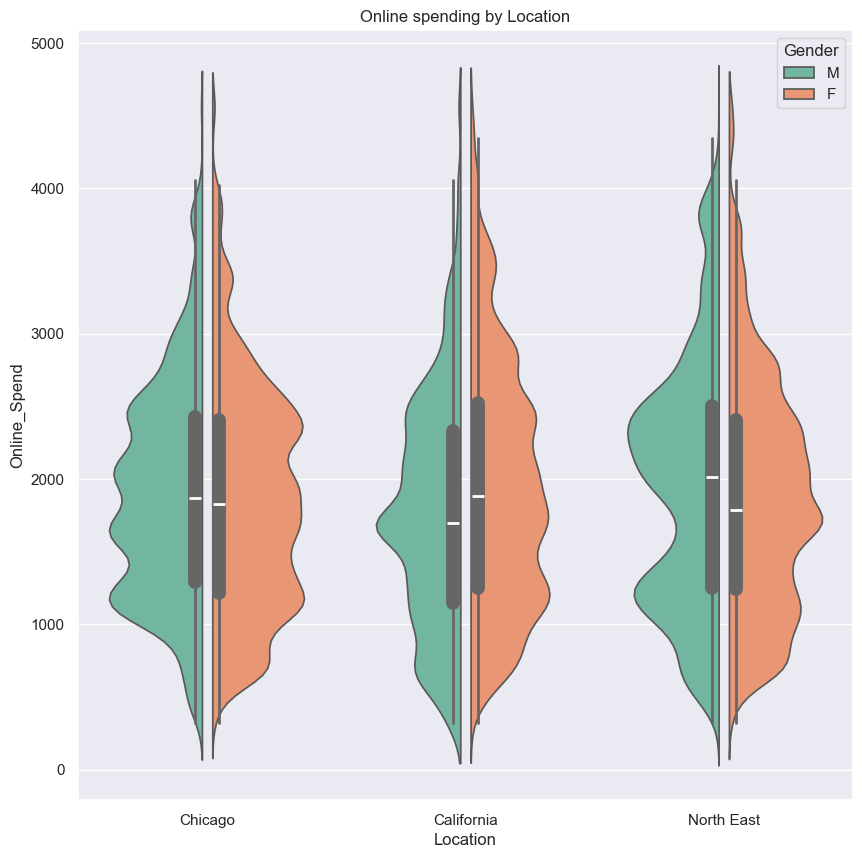

In [94]:
#testing a side by side violin plot
# Python program to illustrate
# violinplot using inbuilt data-set
# given in seaborn
  
# use to set style of background of plot
sns.set(style="whitegrid")
sns.set_theme(rc={"figure.figsize":(10,10)})

 
sns.violinplot(x="Location", y="Online_Spend", hue="Gender",
                    data=clean_shopping_df, palette="Set2", split=True, gap=.1,
                    density_norm="count", inner="box", legend="full", 
                    inner_kws=dict(box_width=10, whis_width=2, color=".4")).set(title="Online spending by Location")
plt.savefig("Online_Spend")


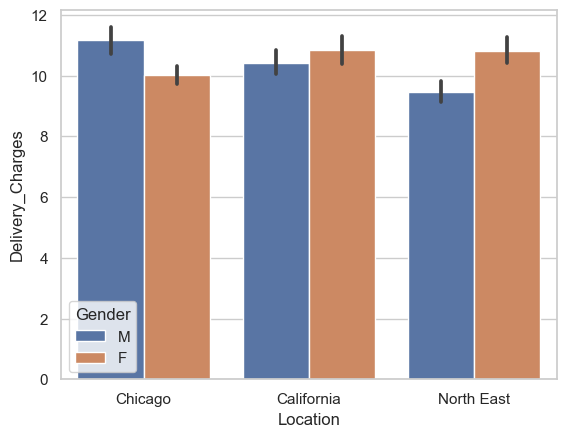

In [76]:
# class v / s fare barplot 
sns.barplot(x = 'class', y = 'fare', hue = 'Gender', data = df)
 
# Show the plot
plt.show()

***Question 1: Is there a difference between men and womens spending habits, ei: do men have fewer transactions but higher cost items vs women many small transactions with smaller transactions?***

In [77]:
# Voilin plots
# scatter plot regressions

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Sample Data')]

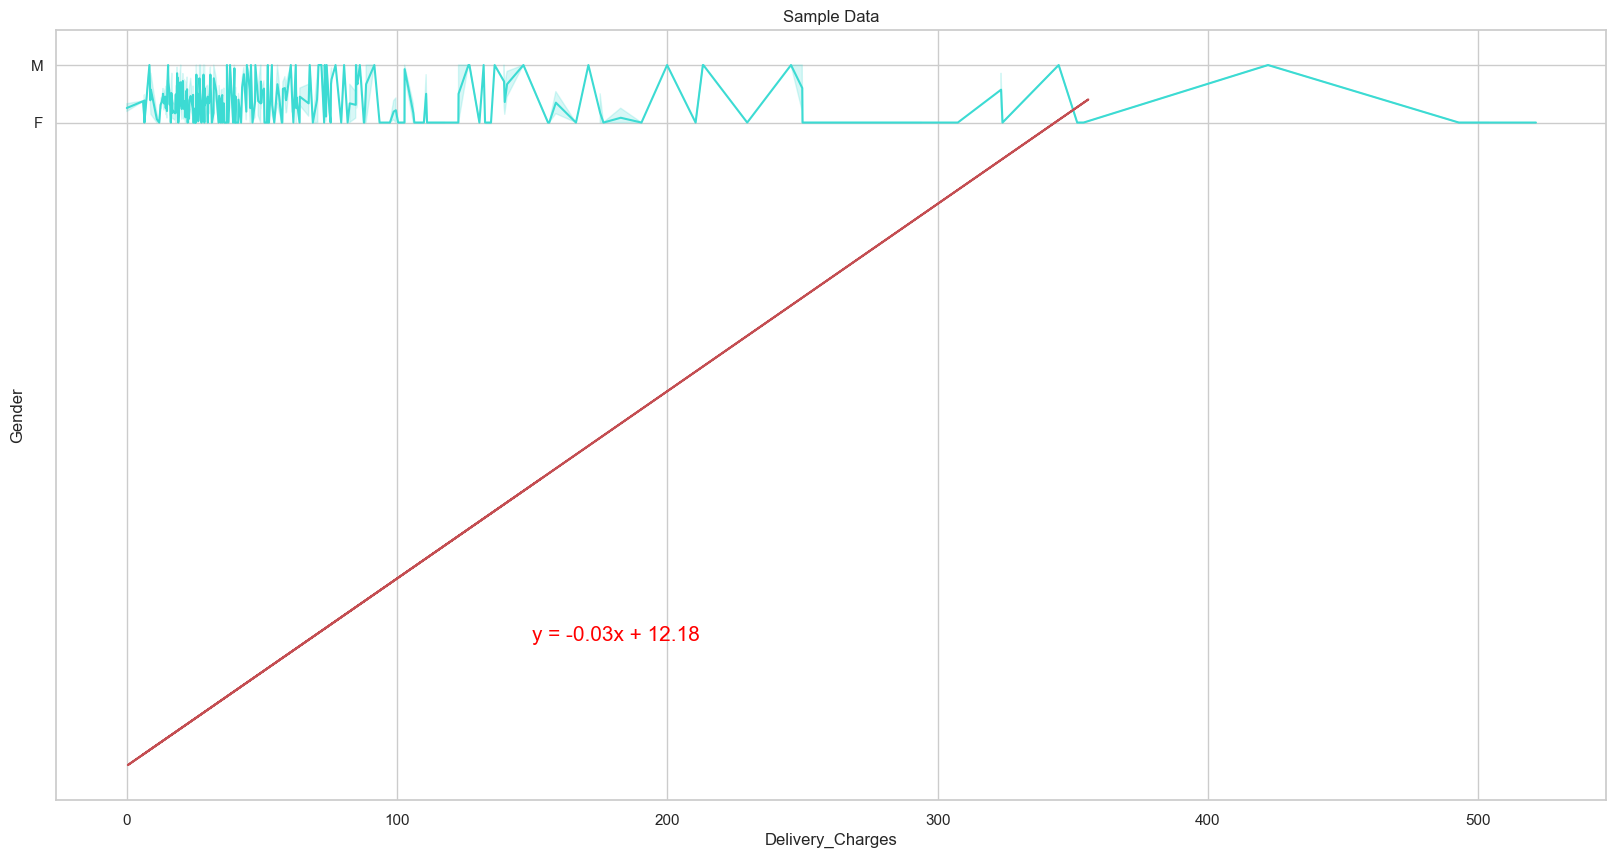

In [113]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.lineplot(x='Delivery_Charges', y='Gender', data=clean_shopping_df, color="#3CDBD3", ax=ax)

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values, regress_values, "r-") # plot the line of best 
plt.annotate(line_eq,(150, 10),fontsize=15,color="red")


ax.set(title='Sample Data')

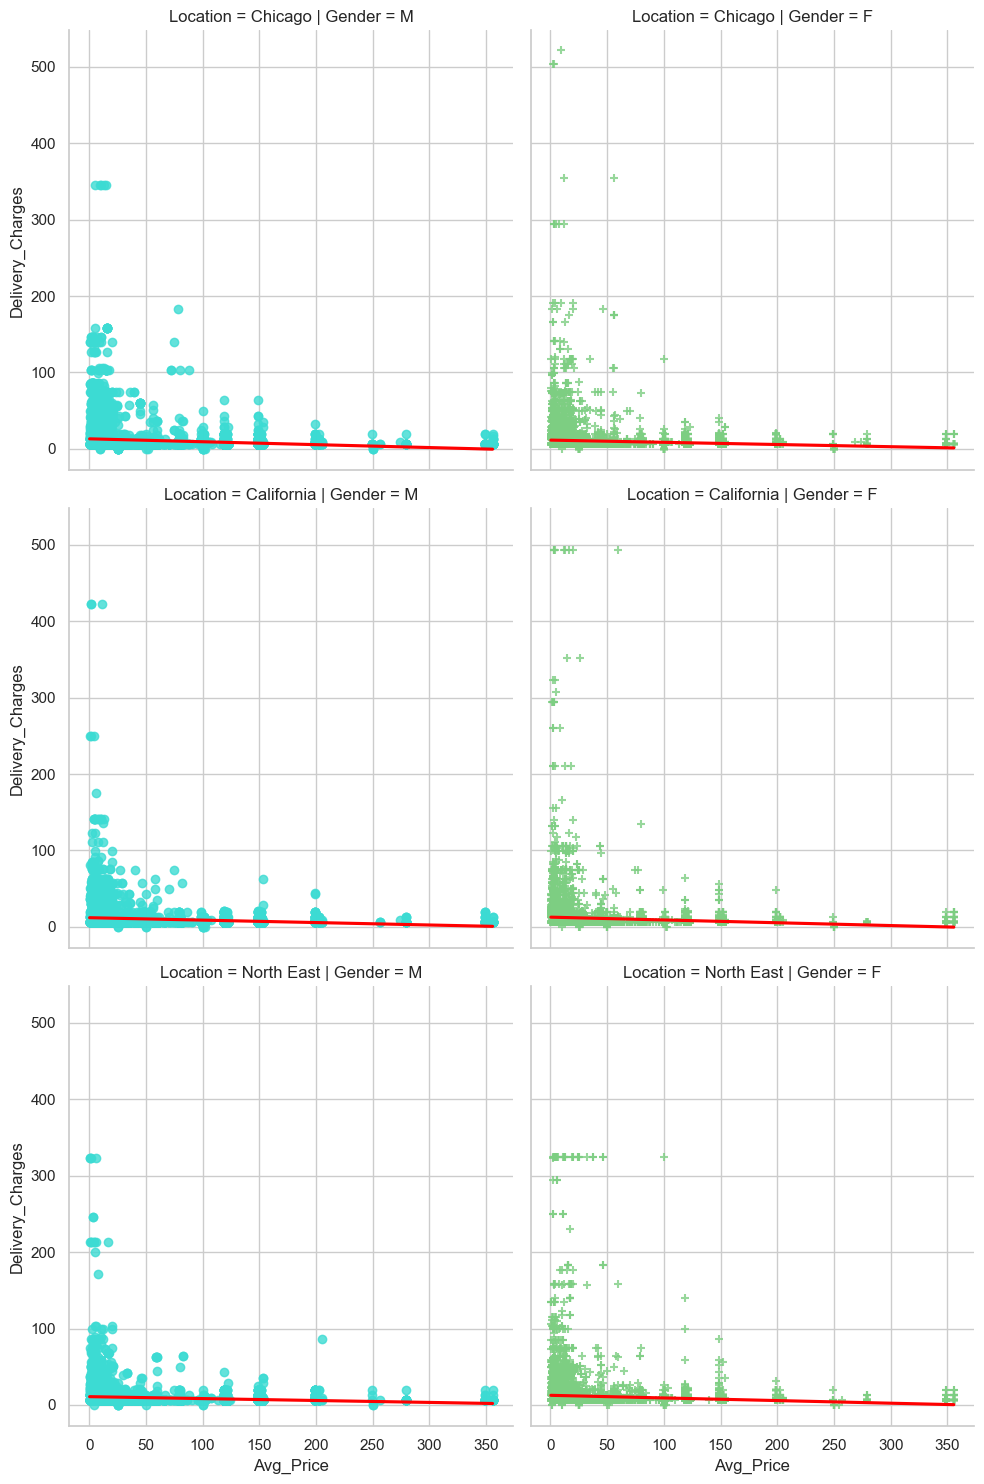

In [94]:
sns.lmplot(x="Avg_Price", y="Delivery_Charges", hue="Gender",
           col="Gender", row="Location", data=clean_shopping_df,markers=["o", "+"], palette=["#3CDBD3","#7DCE82"],line_kws={'color': 'red'})

In [130]:
#sns.lmplot(x="Delivery_Charges", y="Month", hue="Gender",
           #col="Gender", row="Month", data=clean_shopping_df,markers=["o", "+"], 
          # palette=["#3CDBD3","#7DCE82"],line_kws={'color': 'red'})


NameError: name 'Avg_Price' is not defined

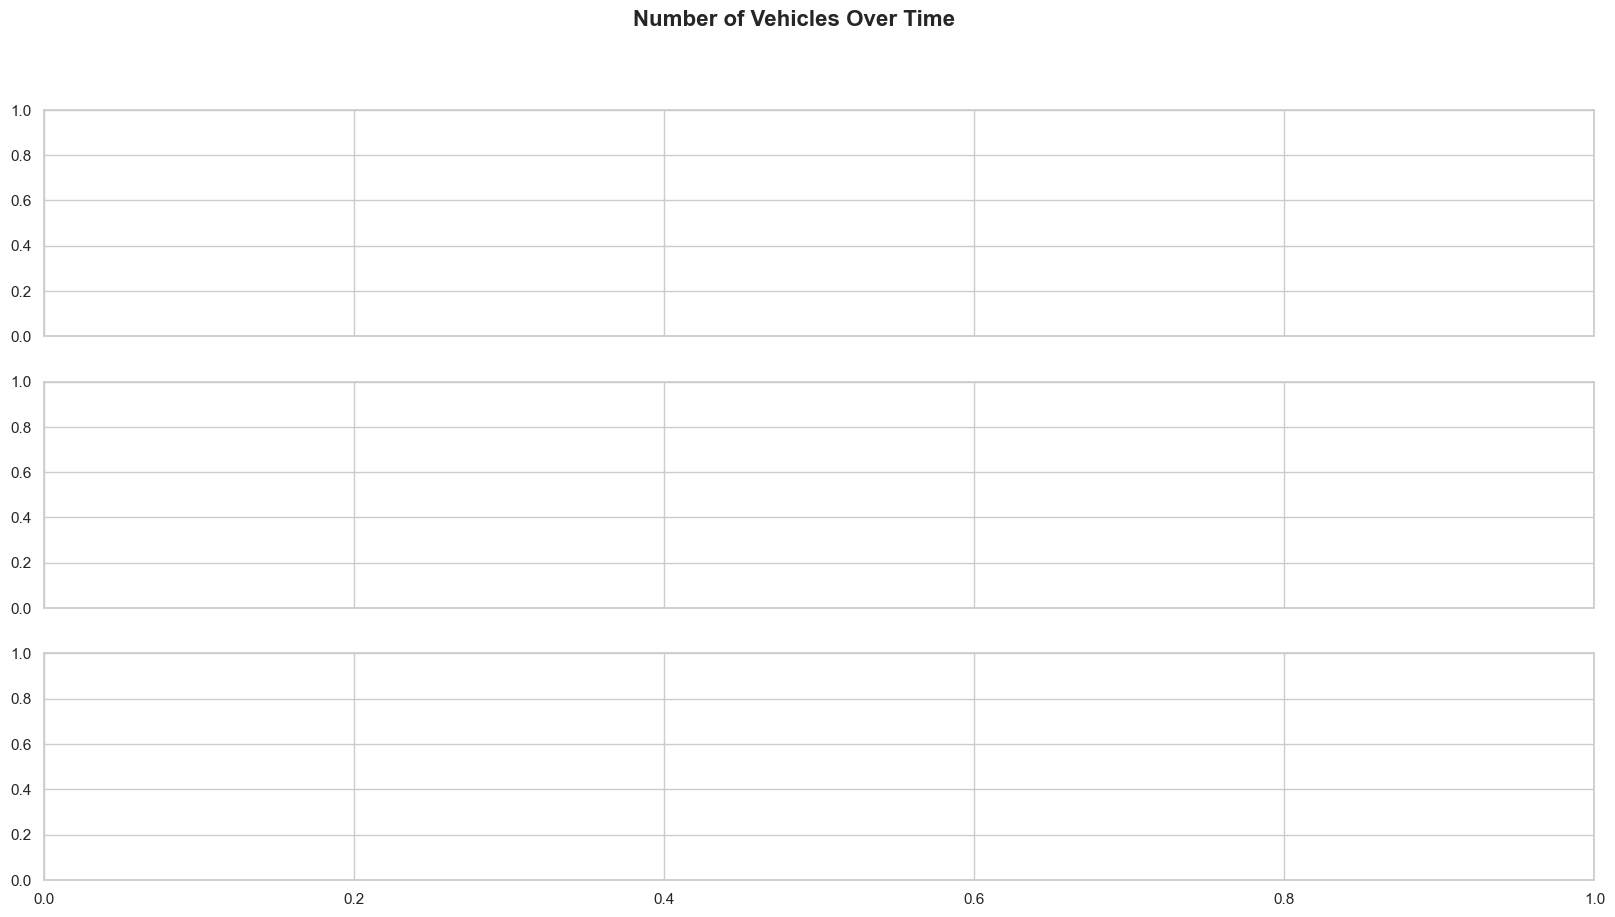

In [109]:
#this is for the gender and shipping price trying to make

 # Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(Avg_Price), max(Avg_Price))
ax1.plot(Avg_Price, Location, linewidth=1, marker="o")
ax1.plot(Avg_Price, pe_fit, "b--", linewidth=1)
ax1.set_ylabel("North East")

ax2.plot(Avg_Price, Location, linewidth=1, marker="o", color="y")
ax2.plot(Avg_Price, p_fit, "y--", linewidth=1)
ax2.set_ylabel("Califorina")

ax3.plot(Avg_Price, Location, linewidth=1, marker="o", color="g")
ax3.plot(Avg_Price, d_fit, "g--", linewidth=1)
ax3.set_ylabel("Chicago")
ax3.set_xlabel("Avg_Price")

plt.show()

***Question 2: Shipping prices: are people more willing to spend more on delivery if the cost of the item is more?***

In [ ]:
#histogram with a trend line
#scatter plot regression

In [ ]:
## Assuming X contains your features and y contains your target variable
#Avg_Price_train, Avg_Price_test, Delivery_Charges_train, Delivery_Charges_test = train_test_split("Avg_Price", "Delivery_Charges", test_size=0.2, random_state=42)

##Create and train the logistic regression model:
#logreg = LogisticRegression()
#logreg.fit(Avg_Price_train, Delivery_Charges_train)

##Make predictions using the trained model:
#Delivery_Charges_pred = logreg.predict(Avg_Price_test)

##Evaluate the model using a confusion matrix and classification report:
#conf_matrix = confusion_matrix(Delivery_Charges_test, Delivery_Charges_train)
#class_report = classification_report(Delivery_Charges_test, Delivery_Charges_pred)
#print("Confusion Matrix:")
#print(conf_matrix)
#print("\nClassification Report:")
#print(class_report)

The r-squared is: 0.011669530024367334


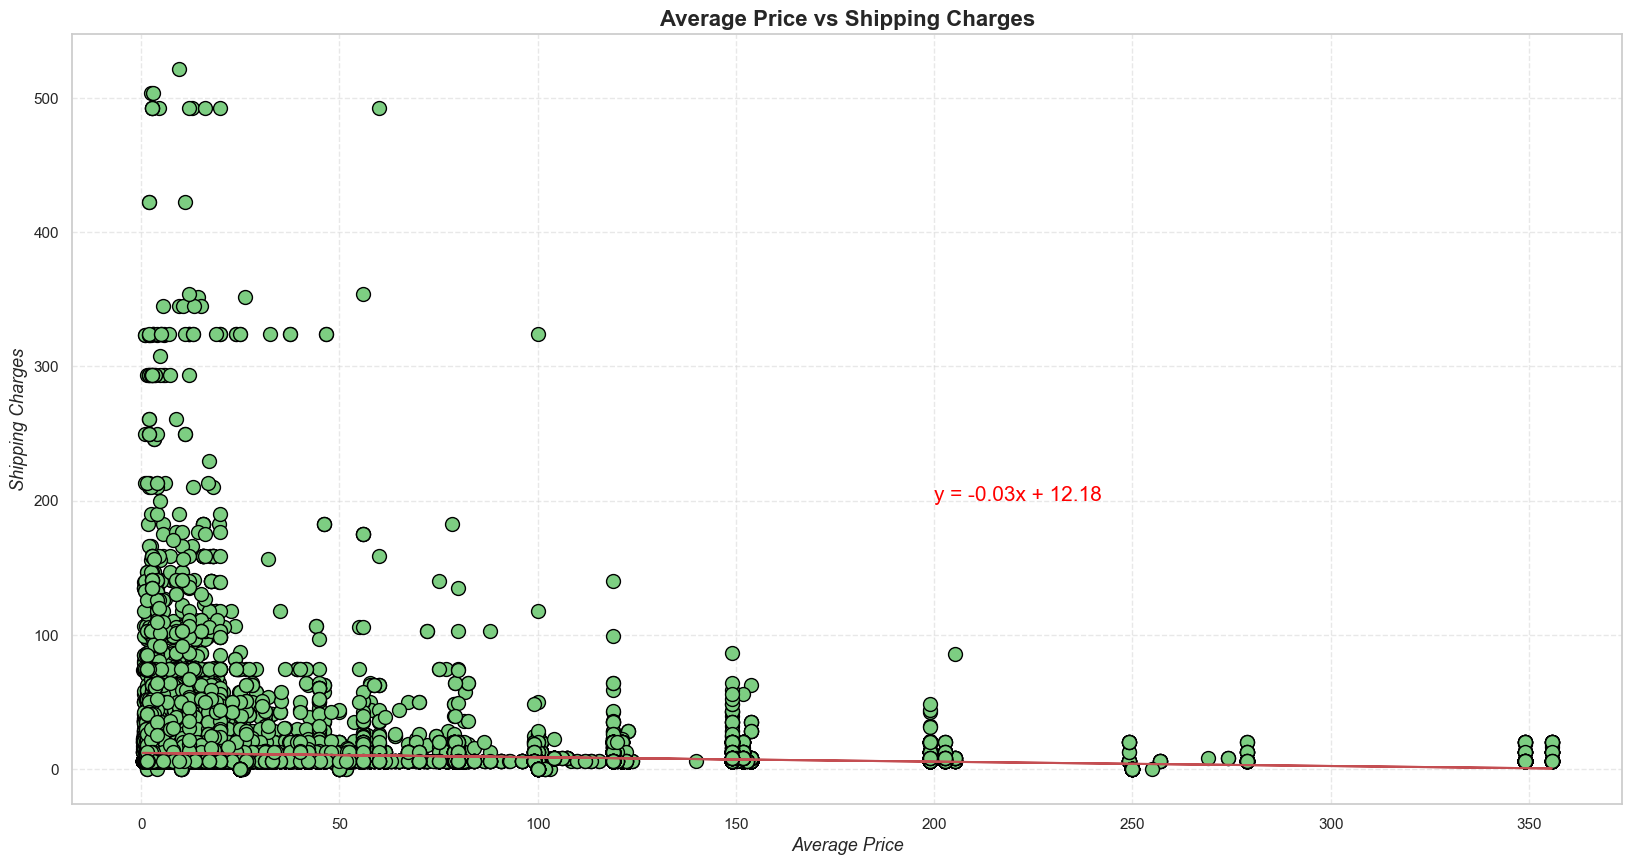

In [117]:
# Build scatter plot for item cost vs shipping cost
#NEED THE R VALUE AND THE LINE OF BEST FIT
x_values = clean_shopping_df["Avg_Price"]
y_values = clean_shopping_df["Delivery_Charges"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#making the plot
#plt.figure(figsize=(10,8))
#a, b = np.polyfit(x, y, 1)

#the basic plot
plt.scatter(x, y, facecolor="#7DCE82", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Average Price", fontsize=13, fontstyle="italic")
plt.ylabel("Shipping Charges", fontsize=13, fontstyle="italic")
plt.title("Average Price vs Shipping Charges", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

plt.annotate(line_eq,(200, 200),fontsize=15,color="red")
#plt.plot(x, a*x+b)
# Save the figure
# plt.savefig("output_data/Fig1.png")
# Show plot

print(f"The r-squared is: {rvalue**2}")
plt.show()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


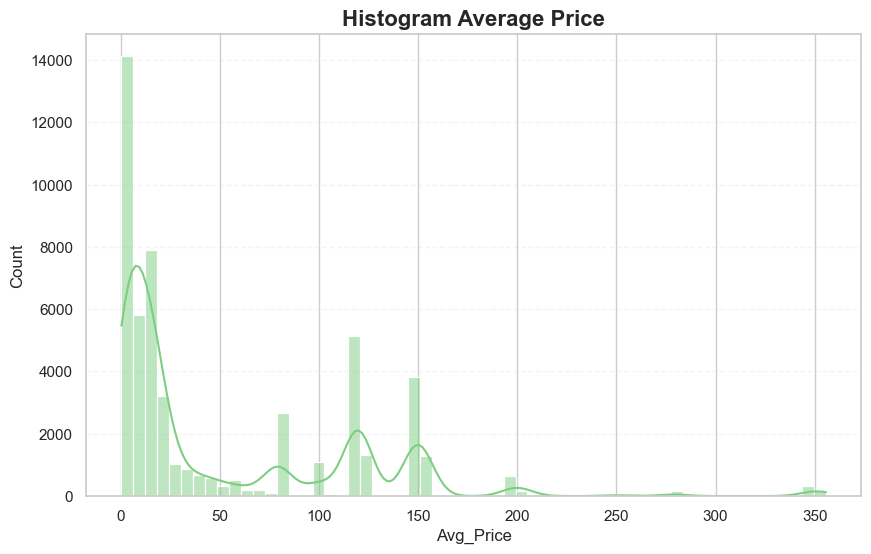

In [96]:
#HISTOGRAM AND AVERAGE PRICE
# Step 1: get the data
x = clean_shopping_df["Avg_Price"]

# create the plot
plt.figure(figsize=(10,6))
sns.histplot(data=x, color="#7DCE82", kde=True) #, bins=20)

# customizations
plt.title("Histogram Average Price", fontsize=16, fontweight="bold")
# plt.ylim(0, 275)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

In [97]:
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_Description  52524 non-null  object 
 7   Product_Category     52524 non-null  object 
 8   Quantity             52524 non-null  float64
 9   Avg_Price            52524 non-null  float64
 10  Delivery_Charges     52524 non-null  float64
 11  Coupon_Status        52524 non-null  object 
 12  GST                  52524 non-null  float64
 13  Date                 52524 non-null  object 
 14  Offline_Spend        52524 non-null  float64
 15  Online_Spend         52524 non-null  floa

***Question 3: Does location influence purchase frequency?***

In [ ]:
# map plot 
# histogram with trend line?

***how does the location distridution look? is there any major differences?***


In [98]:
clean_shopping_df.Location.value_counts().head
# everything is pretty close number wise, there isnt a huuuuuge differce in purchases by location

<bound method NDFrame.head of Location
North East    18276
Chicago       18240
California    16008
Name: count, dtype: int64>

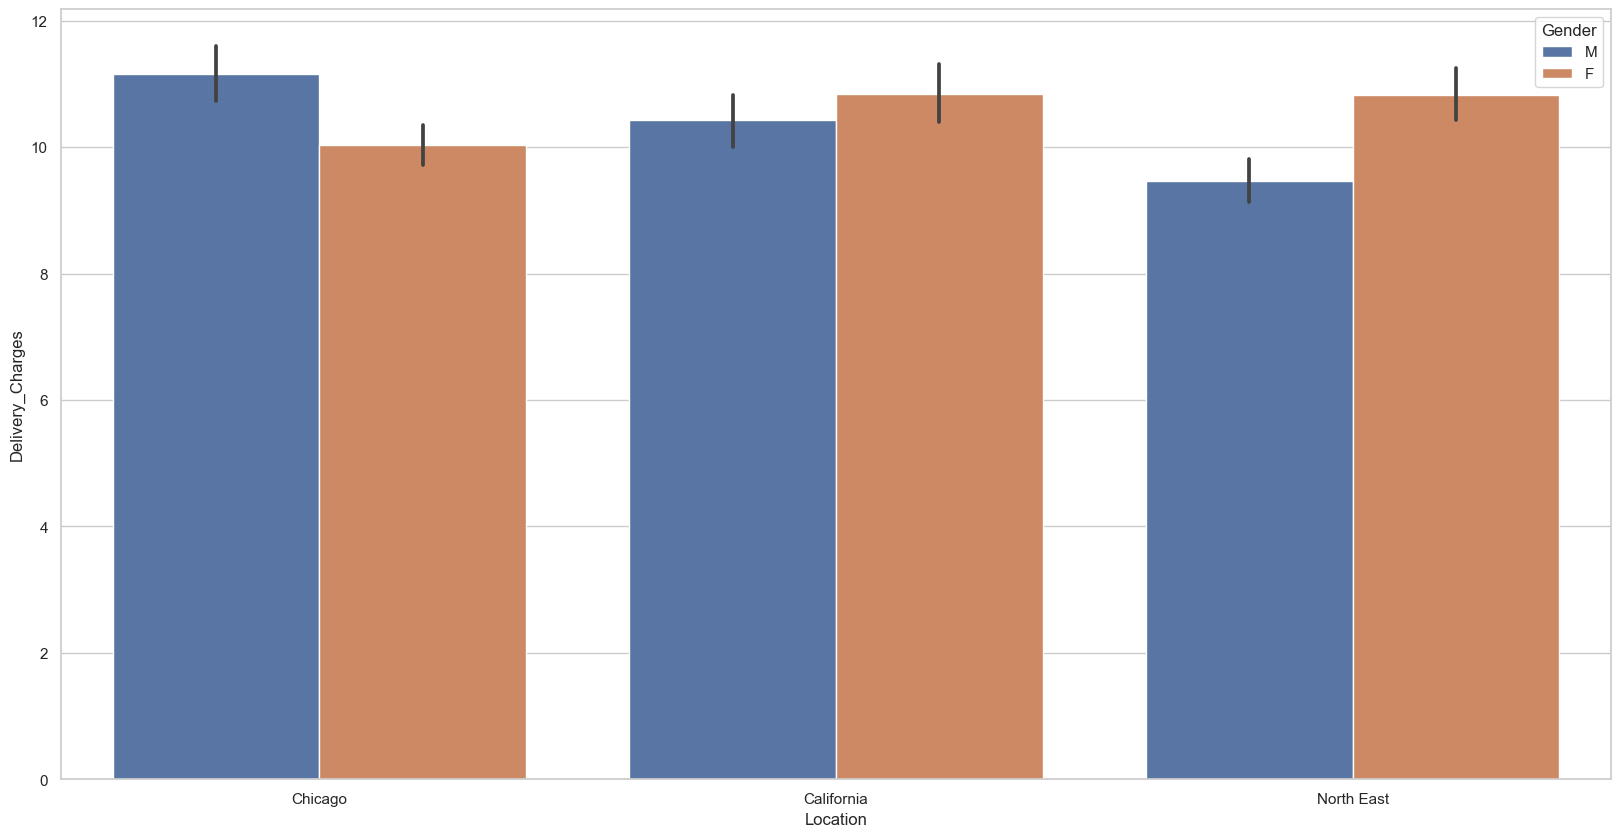

In [99]:
# class v / s fare barplot 
sns.barplot(x = 'Location', y = 'Delivery_Charges', hue = 'Gender', data = clean_shopping_df)
 
# Show the plot
plt.show()

<Axes: xlabel='Avg_Price', ylabel='Delivery_Charges'>

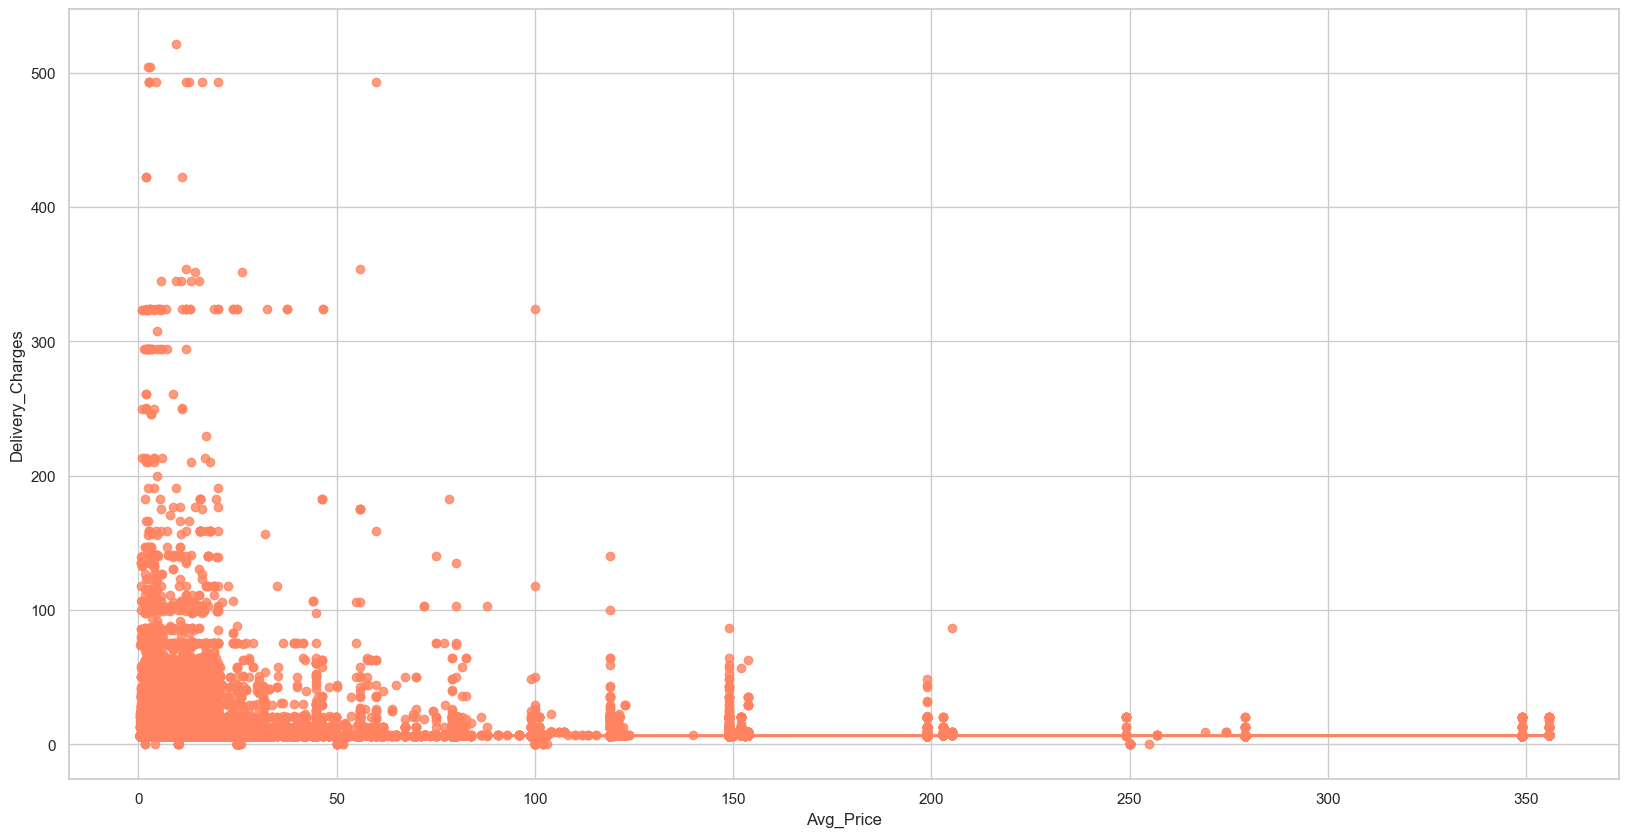

In [168]:
sns.regplot(data=clean_shopping_df, x="Avg_Price", y="Delivery_Charges", lowess=True)

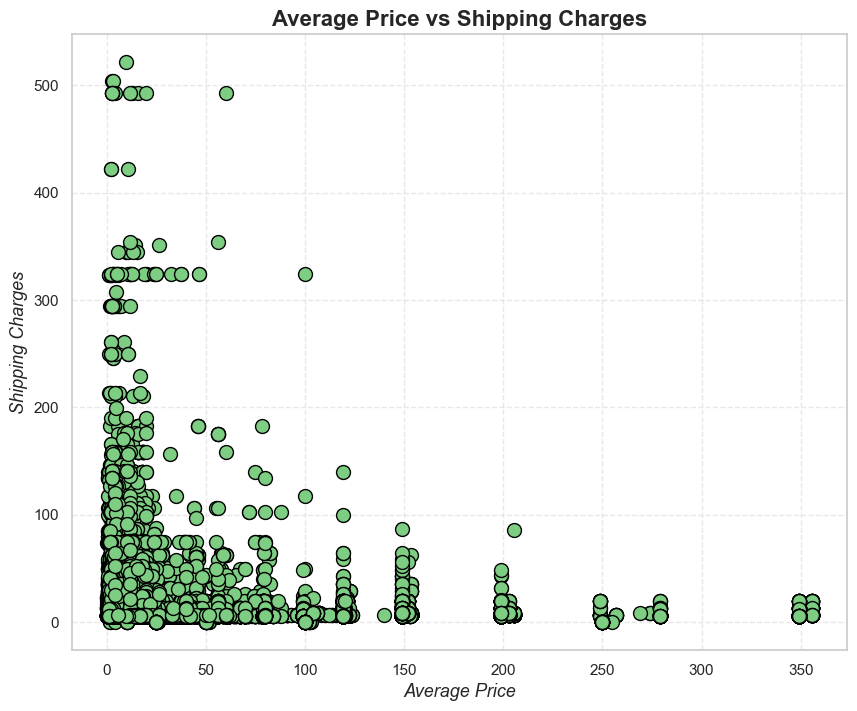

In [114]:
# Build scatter plot for item cost vs shipping cost
x = clean_shopping_df["Avg_Price"]
y = clean_shopping_df["Delivery_Charges"]

plt.figure(figsize=(10,8))

plt.scatter(x, y, facecolor="#7DCE82", edgecolor="black", s=100)
# Incorporate the other graph properties
plt.xlabel("Average Price", fontsize=13, fontstyle="italic")
plt.ylabel("Shipping Charges", fontsize=13, fontstyle="italic")
plt.title("Average Price vs Shipping Charges", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
# Save the figure
# plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

***does gender have anything to do with purchase frequency in these locations?***

In [100]:
#finding the counts of men/ women
clean_shopping_df.Gender.value_counts().head

<bound method NDFrame.head of Gender
F    32767
M    19757
Name: count, dtype: int64>

***seeing if summary stats could help with any of this***

In [110]:
#trying to make a leaderboard for each location so i can look at the data based on location NORTH EAST DATA
north_east_data = clean_shopping_df.loc[clean_shopping_df["Location"] == "North East"]
#clean_shopping_df = north_east_data.loc[north_east_data["Gender"] == 'F']
north_east_data.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 6477
Nest                    5806
Office                  2247
Drinkware               1114
Lifestyle               1029
Bags                     612
Headgear                 286
Notebooks & Journals     251
Waze                     205
Bottles                   92
Accessories               68
Gift Cards                43
Housewares                34
Android                   12
Name: count, dtype: int64>

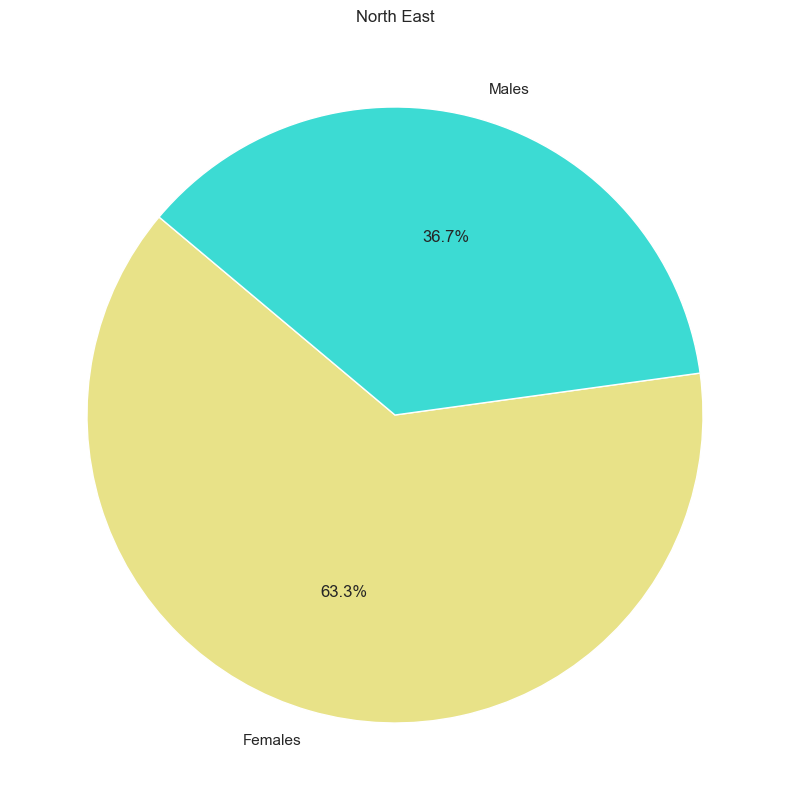

In [102]:
#pi plot to show the gender by location
labels = ["Females", "Males"]
sizes = [11566, 6710]
colors = ["#E8E288", "#3CDBD3"]

plt.title("North East")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.show()

In [103]:
#making a leader board for CALIFORNIA now
cali_data = clean_shopping_df.loc[clean_shopping_df["Location"] == "California"]
cali_data.Gender.value_counts().head

<bound method NDFrame.head of Gender
F    9802
M    6206
Name: count, dtype: int64>

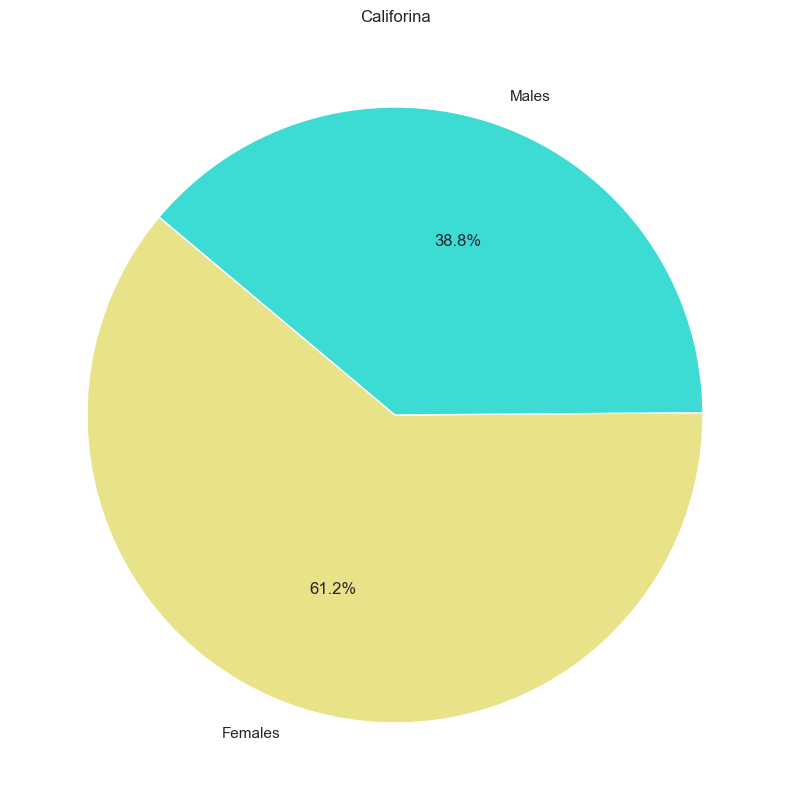

In [104]:
#pi plot to show the gender by location
labels = ["Females", "Males"]
sizes = [9802, 6206]
colors = ["#E8E288", "#3CDBD3"]

plt.title("Califorina")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.show()

In [105]:
#now the CHICAGO leaderboard
chicago_data = clean_shopping_df.loc[clean_shopping_df["Location"] == "Chicago"]
chicago_data.Gender.value_counts().head

<bound method NDFrame.head of Gender
F    11399
M     6841
Name: count, dtype: int64>

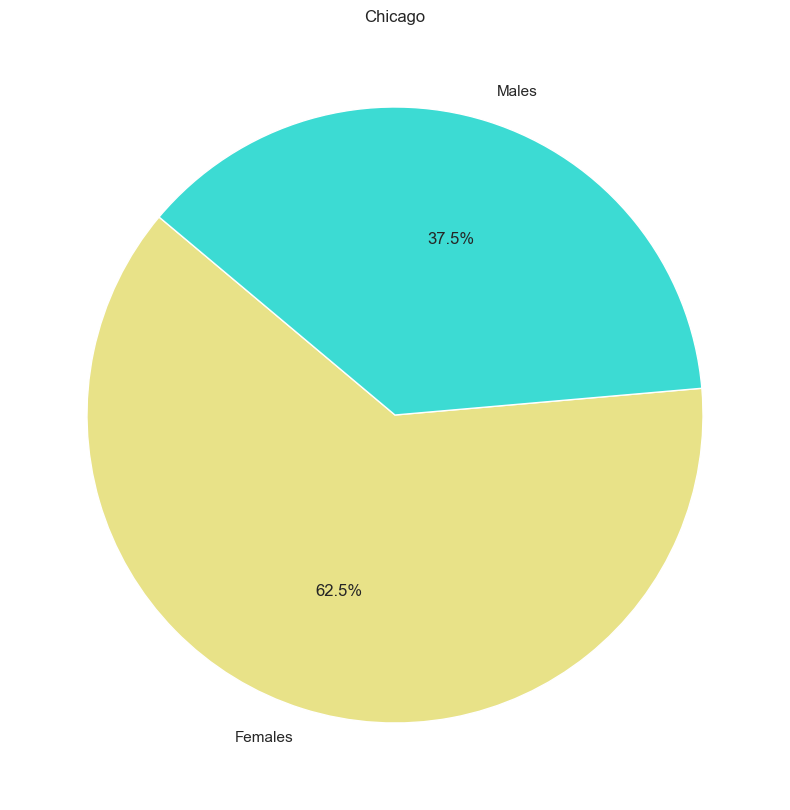

In [107]:
#pi plot to show the gender by location
labels = ["Females", "Males"]
sizes = [11399, 6841]
colors = ["#E8E288", "#3CDBD3"]

plt.title("Chicago")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.show()

thoughts so far: women have more transaction but do they have the highest purchase total? Im thinking its a yes but, men could be buying things that are more expensive.

In [ ]:
# trying to make a leader board that adds the average price and the shipping price 


In [ ]:
#can try a box blot to see what it looks like

In [ ]:
#how does the location influence how often someone makes a purchase?

***Question 4: How do different discount percentages affect the number of repeat customers compared to other discount levels?***

In [ ]:
# websites that i get code from

#adding the regression line for the seaborn plots
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

#setting the violin plot sizing
https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot



